# 第1章 はじめに

## 1.1 機械学習とは

Tom Mitchell による機械学習 (machine learning, ML) の定義：
```
コンピュータープログラムが、ある課題群 T と性能指標 P について経験 E から学習するとは、T の様々な課題においてコンピュータプログラムの性能が経験 E に伴って改善することをいう
```

課題群 $T$、性能指標 $P$、経験 $E$ の種類によって、様々な種類の機械学習が存在する。
本書では、取り扱う全ての未知量を確率変数として扱い、機械学習を確率的な観点から説明する。

## 1.2 教師あり学習
教師あり学習 (supervised learning) における課題 $T$ は、「入力 $x \in \mathcal{X}$ から出力 $y \in \mathcal{Y}$ への写像 $f$ を学習する」ことである。
入力 $x$ は特徴量 (feature)、共変量 (covariate)、予測変数 (predictor) とも呼ばれ、$D$ 次元のベクトルで表現されることが多い。
また、出力 $y$ はラベル (label) や目標値 (target)、応答変数 (response) と呼ぶ。
経験 $E$ は $N$ 個の入出力対 $\mathcal{D} = \{ (x_n, y_n) \}_{n=1}^N$ という形式で与えられ、これらを訓練集合 (training set) と呼ぶ。
ここで、$N$ は標本の大きさである。

### 1.2.1 分類問題 (classification)
分類問題の出力空間は順序のない排他的な $C$ 個のラベルの集合である。
ラベルはクラス (class) とも呼ばれ、出力は $\mathcal{Y}=\{ 1, 2, \cdots, C \}$ である。
与えられた入力からクラスラベルを予測する問題は特にパターン認識 (pattern recognition) と呼ばれ、さらにクラスが2つ ($y \in \{ 0, 1 \}$ または $y \in \{ -1, +1 \}$) の場合には二値分類と呼ばれる。

#### 1.2.1.1 アヤメ属の植物を分類する例題
3種類のアヤメ属 (Iris) の花を分類するための小規模なデータセットとして [Iris データセット](https://archive.ics.uci.edu/dataset/53/iris) が提供されている。
萼片の長さ・萼片の幅・花弁の長さ・花弁の幅という4つの入力情報から、ヒオウギアヤメ (Setosa)・ブルーフラッグ (Versicolor)・ヴァージニカ (Virginica) の3種類のいずれの花であるかを判定する。
Iris データセットの入力空間は $\mathcal{X} = \mathbb{R}^4$ である。
このような小規模データセットでは、データに含まれる特徴量全体を $N \times D$ 行列で表現することがあり、これを計画行列 (design matrix) と呼ぶ。

In [1]:
"""Iris データセットを読み込んで計画行列を表示する"""

print("番号\t", "萼片の長さ\t", "萼片の幅\t", "花弁の長さ\t", "花弁の幅\t", "ラベル")
with open("/data/iris/iris.data", "r") as f:
    for i, l in enumerate(f.readlines()):
        if i in [0, 1, 50, 149]:
            print(i, "\t", "\t\t ".join(l.strip().split(",")))
            if i in [1, 50]:
                print("\t\t\t ...")

番号	 萼片の長さ	 萼片の幅	 花弁の長さ	 花弁の幅	 ラベル
0 	 5.1		 3.5		 1.4		 0.2		 Iris-setosa
1 	 4.9		 3.0		 1.4		 0.2		 Iris-setosa
			 ...
50 	 7.0		 3.2		 4.7		 1.4		 Iris-versicolor
			 ...
149 	 5.9		 3.0		 5.1		 1.8		 Iris-virginica


花の画像から分類を行うことも可能であるが、一般に入力が非常に高次元となるため、畳み込みニューラルネットワーク (convolutional neural network, CNN) などを使う必要がある。
また、Iris データセットは表データ (tabular data) と呼ばれ、入力を固定長のベクトルで表現可能であるが、入力が可変長となる場合も考えられる。
この場合には、特徴量抽出 (feature extraction, featurization) という手続きを経て、固定長の特徴量表現に変換することがある。

#### 1.2.1.2 探索的データ解析 (exploratory data analysis)
機械学習で課題を解く前に、入手したデータに明らかな何らかのパターンや、外れ値やラベル誤りなどの問題がないかを確認する探索的データ解析を行う。
Iris データセットのように特徴量の少ない表データで探索的データ解析を実施する場合には、ペアプロット図を作成することが多い。
ペアプロット図は、$i$ 行 $j$ 列に変数 $i$、変数 $j$ の散布図を描き、$i$ 行 $i$ 列の対角上に変数 $i$ の周辺確率分布を描く。
(ここでは、簡単に対角上にはヒストグラムを表示しています。)

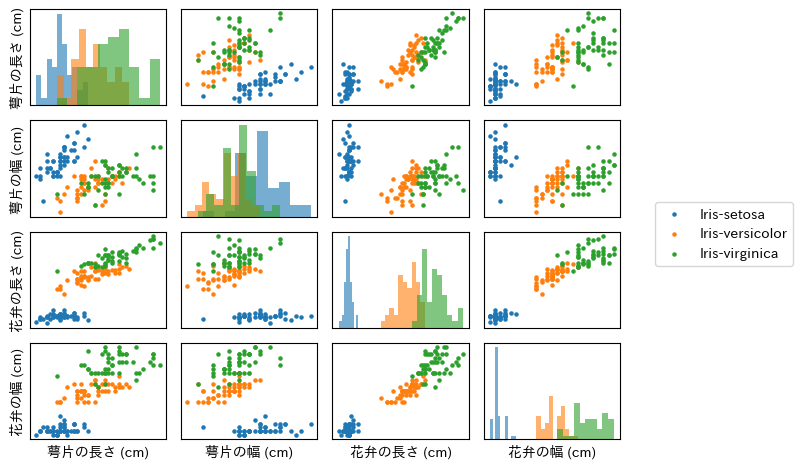

In [15]:
"""ペアプロットの作成"""
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib

iris_data = []
iris_labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
iris_features = ["萼片の長さ (cm)", "萼片の幅 (cm)", "花弁の長さ (cm)", "花弁の幅 (cm)"]

# データのロード
with open("/data/iris/iris.data", "r") as f:
    for l in f.readlines():
        if l.strip() == "":
            break
        sepal_length, sepal_width, petal_length, petal_width, label = l.strip().split(",")
        iris_data.append([float(sepal_length), float(sepal_width), float(petal_length), float(petal_width), label])

# データの描画
fig, axes = plt.subplots(nrows=len(iris_features), ncols=len(iris_features))
for i, target_feature_1 in enumerate(iris_features):
    for j, target_feature_2 in enumerate(iris_features):
        if i == j:
            # 周辺密度関数 (実際にはヒストグラム) の描写
            for target_label in iris_labels:
                data = [d[i] for d in iris_data if d[-1] == target_label]
                axes[i, j].hist(data, alpha=0.6, label=target_label)
        else:
            # 散布図の描写
            for target_label in iris_labels:
                data_1 = [d[i] for d in iris_data if d[-1] == target_label]
                data_2 = [d[j] for d in iris_data if d[-1] == target_label]
                axes[j, i].scatter(data_1, data_2, s=5, label=target_label)

for i, ax in enumerate(axes.flat):
    ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    ax.tick_params(bottom=False, left=False, right=False, top=False)
    ax.set(xlabel=iris_features[int(i % len(iris_features))], ylabel=iris_features[int(i / len(iris_features))])
    ax.label_outer()

# 右端中央に凡例を表示
h, l = axes[0, len(iris_labels) - 1].get_legend_handles_labels()
fig.legend(h, l, loc='center left', bbox_to_anchor=(1.02, 0.5))

# レイアウトの指定と表示
fig.tight_layout()
plt.show()

高次元のデータを扱う場合には、次元削減 (dimensionality reduction) を実施してから可視化すると良い。

#### 1.2.1.3 分類器の学習
上のプロットを見ると、```Iris-setosa``` は花弁の長さを使えば簡単に見分けられると考えられる。
例えば、花弁の長さが 2.45cm 以下であれば ```Iris-setosa``` と判定する、以下のような決定則 (decision rule) を作ることができる。

$$
f(x; \boldsymbol{\theta}) = \begin{cases}
    Setosa & (花弁の長さ < 2.45) \\
    Versicolor\ or\ Virginica & (それ以外)
  \end{cases}
$$

さらに ```Iris-versicolor``` と ```Iris-virginica``` を見分けるためには、さらに決定則を追加する必要がある。
このように、複数の決定速を木構造で表したものを決定木 (decision tree) と呼び、決定則によって設定された判定の境界を決定境界 (decision surface) 呼ぶ。
また、決定則の式における $\boldsymbol{\theta}$ はパラメータと呼ばれる。

#### 1.2.1.4 経験損失最小化
教師あり学習の目的は、様々な入力に対して信頼できるラベルを予測できるようにモデルを学習することである。
この課題の性能指標には、一般的に訓練データ上の誤分類率 (misclassification rate) が用いられる。

$$
\mathcal{L}(\boldsymbol{\theta}) \triangleq \frac{1}{N} \sum^N_{n=1} \mathbb{I}(y_n \neq f(x_n; \boldsymbol{\theta}))
$$